<a href="https://colab.research.google.com/github/frantholy/rendimiento_tiendas_ALURA/blob/main/Desaf%C3%ADo_Rendimiento_Tiendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------------------
# 📝 INTRODUCCIÓN DESAFÍO:

El presente desafío tiene como objetivo **evaluar el rendimiento integral de cuatro tiendas** con el fin de determinar cuál de ellas debería ser vendida por el dueño Juan, para optimizar la estrategia del negocio. Para ello, se recopilarán y analizarán datos clave en distintas áreas de desempeño, incluyendo:

- **Volumen y distribución de ventas por categoría.**
- **Calificación promedio de clientes.**
- **Costos de envío promedio.**
- **Ingresos generados.**
- **Indicadores de satisfacción y eficiencia operativa.**

A través de un enfoque analítico, se busca no solo identificar la tienda con mayor o menor rendimiento en términos absolutos, sino también comprender los **patrones y particularidades** de cada negocio, evaluando tanto fortalezas como debilidades operativas.  

Este análisis permitirá fundamentar una decisión estratégica orientada a **maximizar el valor de la venta**, liberar recursos y fortalecer la rentabilidad global del portafolio de tiendas.

-------------

### IMPORTAR LIBRERIAS

In [ ]:
## Se importan las librerías esenciales.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
from matplotlib.ticker import FuncFormatter

### IMPORTAR DATOS DESDE GITHUB ALURA

In [ ]:
# Definimos las URLs donde se encuentran los archivos CSV con la información de las tiendas
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leemos cada archivo CSV desde su respectiva URL y los almacenamos en DataFrames
tienda1 = pd.read_csv(url)   # Datos de la tienda 1
tienda2 = pd.read_csv(url2) # Datos de la tienda 2
tienda3 = pd.read_csv(url3) # Datos de la tienda 3
tienda4 = pd.read_csv(url4) # Datos de la tienda 4

# Mostramos las primeras 5 filas del DataFrame 'tienda'
tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### 1. Análisis de facturación

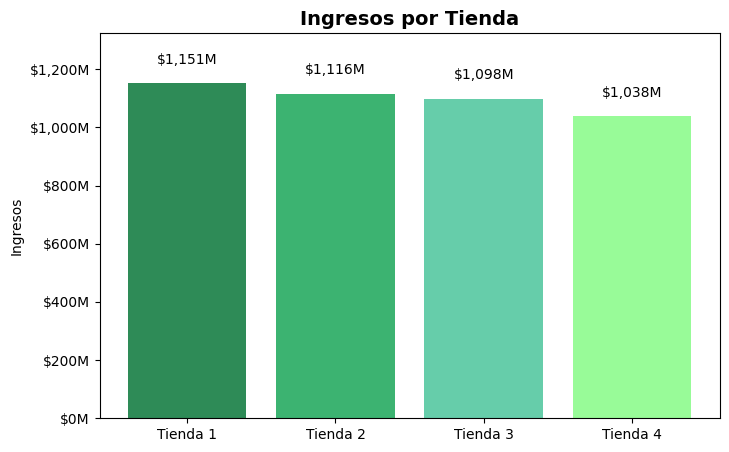

In [ ]:
# Calcular ingresos totales por tienda sumando la columna 'Precio' de cada DataFrame
ingreso_tienda1 = tienda1['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Listas con nombres de las tiendas y sus ingresos correspondientes
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_totales = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Colores de las barras (tonalidades de verde)
bar_colors = ['#2e8b57', '#3cb371', '#66cdaa', '#98fb98']

# Función para formatear valores como millones de dólares sin decimales
def millones(x, pos=None):
    """
    Convierte un valor numérico en millones de dólares (M), sin decimales.
    Ejemplo: 2500000 -> $2M
    """
    if pd.isna(x) or x == 0:
        return '$0M'
    return f'${x/1_000_000:,.0f}M'

# Crear la figura y el objeto de ejes para el gráfico
fig, ax = plt.subplots(figsize=(8, 5))

# Graficar el diagrama de barras con colores definidos
ax.bar(nombres, ingresos_totales, color=bar_colors)

# Aplicar formato de millones al eje Y
ax.yaxis.set_major_formatter(FuncFormatter(millones))

# Título y etiqueta del eje Y
ax.set_title("Ingresos por Tienda", fontsize=14, fontweight='bold')
ax.set_ylabel("Ingresos")

# Añadir etiquetas de valores encima de cada barra
for i, v in enumerate(ingresos_totales):
    if not pd.isna(v):  # Solo mostrar si el valor no es NaN
        ax.text(i,                                     # Posición en el eje X
                v + max(ingresos_totales) * 0.05,      # Posición en el eje Y (ligeramente encima de la barra)
                millones(v),                           # Texto formateado
                ha='center', va='bottom', fontsize=10, # Alineación y tamaño
                bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 2, 'edgecolor': 'none'})  # Caja de fondo para el texto

# Ajustar límites del eje Y para dejar espacio a las etiquetas
if ingresos_totales and not all(pd.isna(x) for x in ingresos_totales if isinstance(x, (int, float))):
    ax.set_ylim(0, max(ingresos_totales) * 1.15)
else:
    ax.set_ylim(0, 1)

# Mostrar el gráfico
plt.show()

**🔍 ANÁLISIS INGRESOS POR TIENDA:**

**Ingresos Totales**  
La facturación combinada de las cuatro tiendas alcanza aproximadamente **USD 4.403 millones**, resultado de la suma de:  
- **Tienda 1:** USD 1.151 millones  
- **Tienda 2:** USD 1.116 millones  
- **Tienda 3:** USD 1.098 millones  
- **Tienda 4:** USD 1.038 millones  

**Ranking por Ingresos**  
1. **Tienda 1** – Lidera con aproximadamente **USD 1.151 millones**.  
2. **Tienda 2** – Le sigue con cerca de **USD 1.116 millones**.  
3. **Tienda 3** – Tercera posición con aproximadamente **USD 1.098 millones**.  
4. **Tienda 4** – Menor facturación con cerca de **USD 1.038 millones**.  

**Diferencias Relevantes**  
Aunque todas las tiendas superan los **USD 1.000 millones** en ingresos, existe una brecha notable entre la de mayor rendimiento (Tienda 1) y la de menor rendimiento (Tienda 4), equivalente a **aproximadamente USD 113 millones**.  
Por su parte, las Tiendas 2 y 3 muestran niveles de facturación muy similares entre sí.

### 2. Ventas por categoría

In [ ]:
# ===============================
# TABLA COMPARATIVA DE CATEGORÍAS
# ===============================

# Contar ventas por categoría para cada tienda
conteo_cat_tienda1 = tienda1['Categoría del Producto'].value_counts()
conteo_cat_tienda2 = tienda2['Categoría del Producto'].value_counts()
conteo_cat_tienda3 = tienda3['Categoría del Producto'].value_counts()
conteo_cat_tienda4 = tienda4['Categoría del Producto'].value_counts()

# Unir todos los conteos en un solo DataFrame para comparación
tabla_categorias = pd.DataFrame({
    'Tienda 1': conteo_cat_tienda1,
    'Tienda 2': conteo_cat_tienda2,
    'Tienda 3': conteo_cat_tienda3,
    'Tienda 4': conteo_cat_tienda4
}).fillna(0).astype(int)  # Rellenar NaN con 0 y convertir a enteros

# Mostrar tabla
display(HTML(f"<h5><b>Ventas por Categoría en cada Tienda: </b></h5>"))
display(tabla_categorias)

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


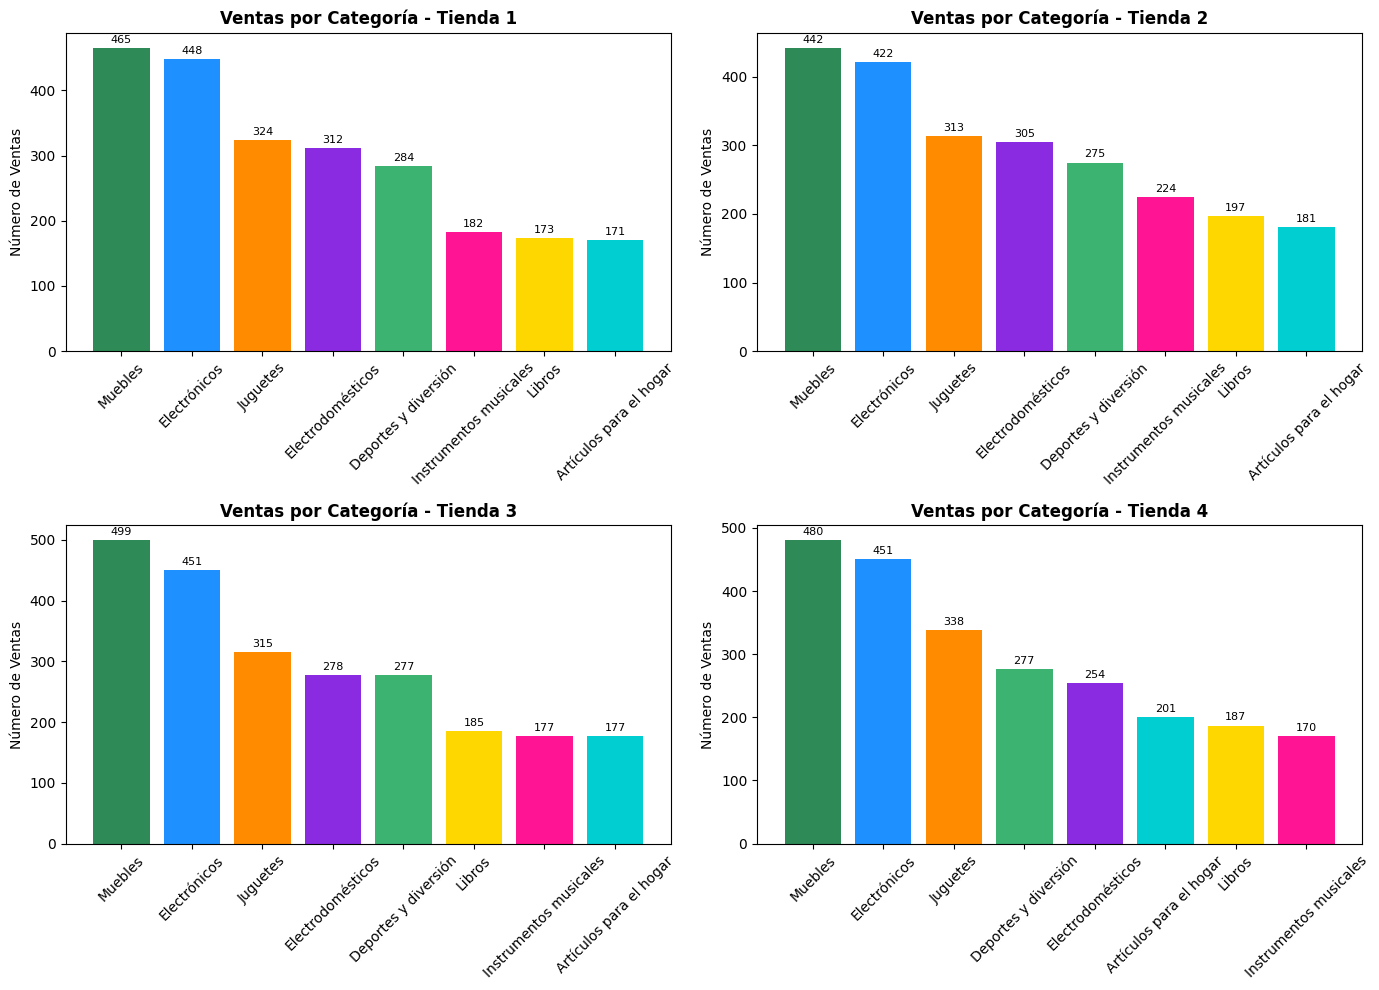

In [ ]:
# ===============================
# GRÁFICOS POR TIENDA
# ===============================

# Colores fijos por categoría
color_map = {
    'Muebles': '#2e8b57',                # Verde oscuro
    'Electrónicos': '#1e90ff',           # Azul brillante
    'Juguetes': '#ff8c00',               # Naranja
    'Electrodomésticos': '#8a2be2',      # Violeta
    'Deportes y diversión': '#3cb371',   # Verde medio
    'Instrumentos musicales': '#ff1493', # Rosa fuerte
    'Libros': '#ffd700',                 # Amarillo
    'Artículos para el hogar': '#00ced1' # Turquesa oscuro
}
default_color = '#b0c4de'  # Azul grisáceo por defecto

# Lista de datos de las tiendas
tiendas_data = [
    ("Tienda 1", conteo_cat_tienda1),
    ("Tienda 2", conteo_cat_tienda2),
    ("Tienda 3", conteo_cat_tienda3),
    ("Tienda 4", conteo_cat_tienda4)
]

# Crear figura y ejes (2 filas × 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Convertir a lista para iterar fácilmente

# Graficar cada tienda en su posición
for ax, (nombre_tienda, conteo_cat) in zip(axes, tiendas_data):
    categorias = conteo_cat.index.tolist()
    conteos = conteo_cat.values.tolist()
    colores_categorias = [color_map.get(cat, default_color) for cat in categorias]

    ax.bar(categorias, conteos, color=colores_categorias)
    ax.set_title(f"Ventas por Categoría - {nombre_tienda}", fontsize=12, fontweight='bold')
    ax.set_ylabel("Número de Ventas")
    ax.tick_params(axis='x', rotation=45)

    # Añadir etiquetas sobre cada barra
    for i, v in enumerate(conteos):
        if v > 0:
            ax.text(i, v + max(conteos) * 0.01, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

**🔍 ANÁLISIS VENTAS POR CATEGORÍA**

**Ventas Totales:**  
El número total de ventas acumuladas en las cuatro tiendas, sumando todas las categorías, es de **9.435 unidades**.

**Ranking por Categoría basado en las ventas generadas:**  
1. **Muebles:** Lidera con un total de **1.886 ventas**.  
2. **Electrónicos:** Sigue con **1.772 ventas**.  
3. **Juguetes:** Ocupa el tercer lugar con **1.290 ventas**.  
4. **Electrodomésticos:** Registra **1.149 ventas**.  
5. **Deportes y diversión:** Suma **1.113 ventas**.  
6. **Instrumentos musicales:** Alcanza **753 ventas**.  
7. **Libros:** Llega a **742 ventas**.  
8. **Artículos para el hogar:** Cierra la lista con **730 ventas**.

**Diferencias Notables:**  
Las categorías **"Muebles"**, **"Electrónicos"** y **"Juguetes"** son consistentemente las más populares en términos de ventas en las cuatro tiendas, ocupando los tres primeros lugares respectivamente.  

Sin embargo, el patrón cambia en la **Tienda 4**, que es la única donde la categoría en cuarto lugar no es **"Electrodomésticos"**, sino **"Deportes y diversión"**. Como consecuencia, en la Tienda 4 la categoría de **"Electrodomésticos"** se desplaza al quinto lugar, intercambiándose con **"Deportes y diversión"** respecto a las otras tiendas.  

Para el sexto lugar, las Tiendas 1 y 2 tienen la categoría **"Instrumentos musicales"**, mientras que las Tiendas 3 y 4 presentan **"Libros"** y **"Artículos para el hogar"** respectivamente.  

En el séptimo lugar, las Tiendas 1 y 2 cuentan con la categoría **"Libros"**, mientras que las Tiendas 3 y 4 tienen **"Instrumentos musicales"** y **"Libros"**, respectivamente.  

Finalmente, en el último lugar, las Tiendas 1, 2 y 3 coinciden en la categoría **"Artículos para el hogar"**, pero la Tienda 4 rompe este patrón teniendo en último lugar la categoría **"Instrumentos musicales"**.

### 3. Calificación promedio de la tienda


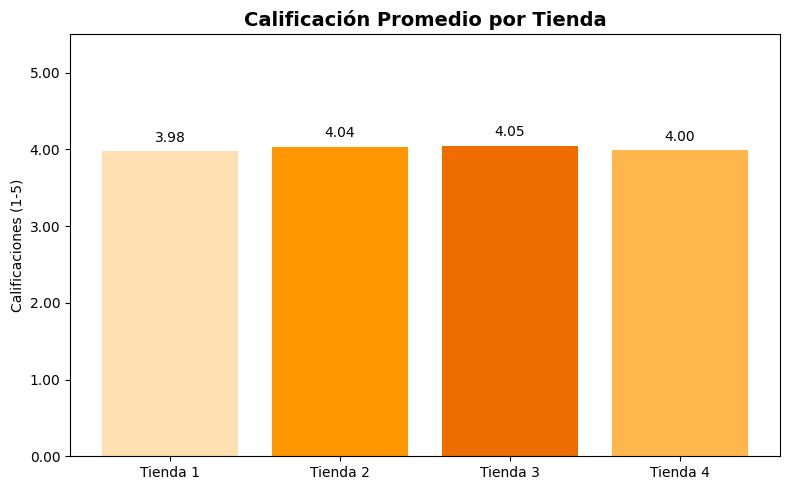

In [ ]:
# Lista de DataFrames y nombres
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Intentar calcular las calificaciones promedio, asignando pd.NA si falla
calificaciones_promedio = []
for df in tiendas:
    try:
        calif = df['Calificación'].mean()
        calificaciones_promedio.append(calif)
    except (KeyError, TypeError):
        calificaciones_promedio.append(pd.NA)

# Filtrar índices y valores válidos para graficar
valores_validos = [(i, calif) for i, calif in enumerate(calificaciones_promedio) if pd.notna(calif) and isinstance(calif, (int, float))]
if valores_validos:
    # Ordenar por calificación descendente para asignar colores
    valores_ordenados = sorted(valores_validos, key=lambda x: x[1], reverse=True)

    # Paleta de naranjas (de más oscuro a más claro)
    colores_base = ['#ef6c00', '#ff9800', '#ffb74d', '#ffe0b2']
    colores_mapeados = {idx: colores_base[i] if i < len(colores_base) else colores_base[-1] for i, (idx, _) in enumerate(valores_ordenados)}

    # Preparar datos para graficar en orden original
    indices_validos, califs_validas = zip(*valores_validos)
    colores_finales = [colores_mapeados[i] for i in indices_validos]
    nombres_validos = [nombres[i] for i in indices_validos]
else:
    # No hay datos válidos
    indices_validos = []
    califs_validas = []
    colores_finales = []
    nombres_validos = []

# Función para formatear eje y
def format_rating(x, pos=None):
    return f'{x:.2f}'

# Graficar
fig, ax = plt.subplots(figsize=(8, 5))

if nombres_validos:
    ax.bar(nombres_validos, califs_validas, color=colores_finales)
    max_calif = max(califs_validas)
    for i, v in enumerate(califs_validas):
        ax.text(i, v + max_calif * 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
else:
    ax.text(0.5, 0.5, 'Sin datos de calificación válidos', ha='center', va='center', transform=ax.transAxes)

ax.yaxis.set_major_formatter(FuncFormatter(format_rating))
ax.set_title("Calificación Promedio por Tienda", fontsize=14, fontweight='bold')
ax.set_ylabel("Calificaciones (1-5)")
ax.set_ylim(0, 5.5)

plt.tight_layout()
plt.show()


**🔍 ANÁLISIS CALIFICACIÓN DE LAS TIENDAS**

**Calificaciones Generales:**  
La calificación promedio considerando las cuatro tiendas es aproximadamente **4.02 puntos**, resultado del promedio de las calificaciones individuales: 3.98, 4.04, 4.05 y 4.00.

**Ranking de Tiendas según Calificación Promedio:**  
1. **Tienda 3:** Encabeza el ranking con una calificación promedio de **4.05 puntos**.  
2. **Tienda 2:** Le sigue muy de cerca con **4.04 puntos**.  
3. **Tienda 4:** Ocupa el tercer lugar con **4.00 puntos**.  
4. **Tienda 1:** Registra la calificación promedio más baja con **3.98 puntos**.

**Diferencias Relevantes:**  
Las calificaciones promedio entre las tiendas son muy similares, todas rondando los **4.0 puntos** sobre 5. La diferencia entre la tienda con la calificación más alta (Tienda 3) y la más baja (Tienda 1) es mínima, apenas **0.07 puntos**.  

Esto indica un nivel de satisfacción del cliente homogéneo y generalmente positivo en todas las tiendas.

### 4. Productos más y menos vendidos

C:\Users\Francisco Torres R\AppData\Local\Temp\ipykernel_18268\1739848634.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap(cmap_name)(np.linspace(0.3, 0.8, len(productos)))


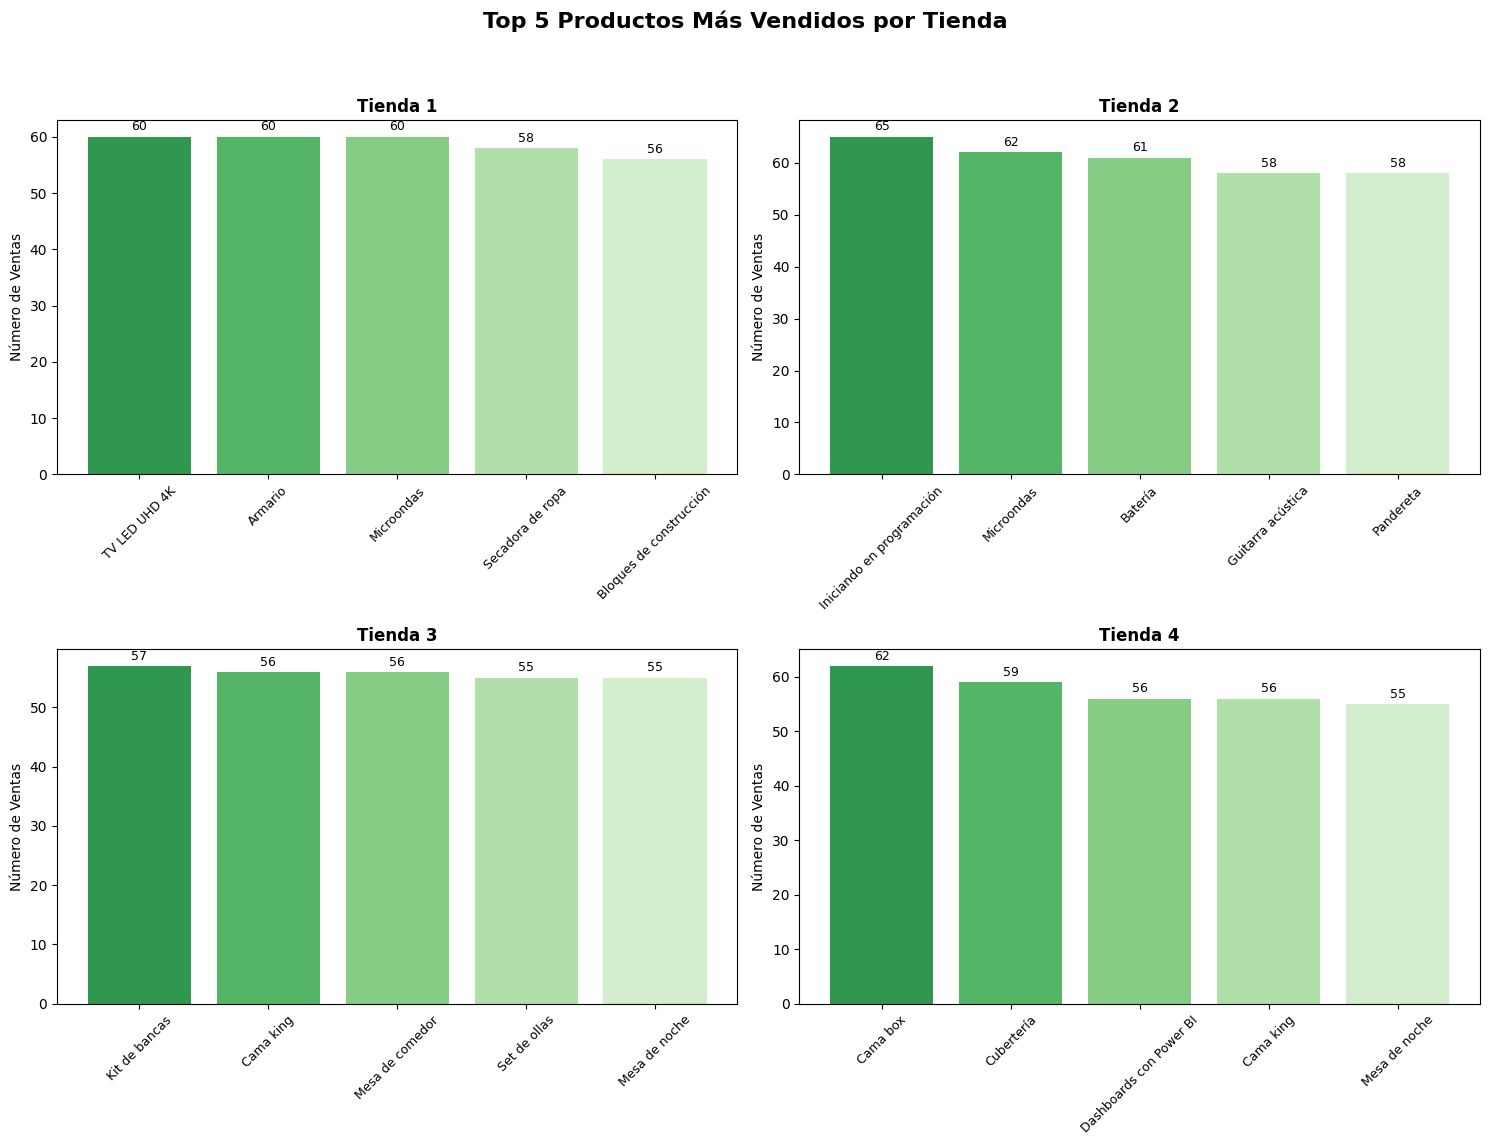

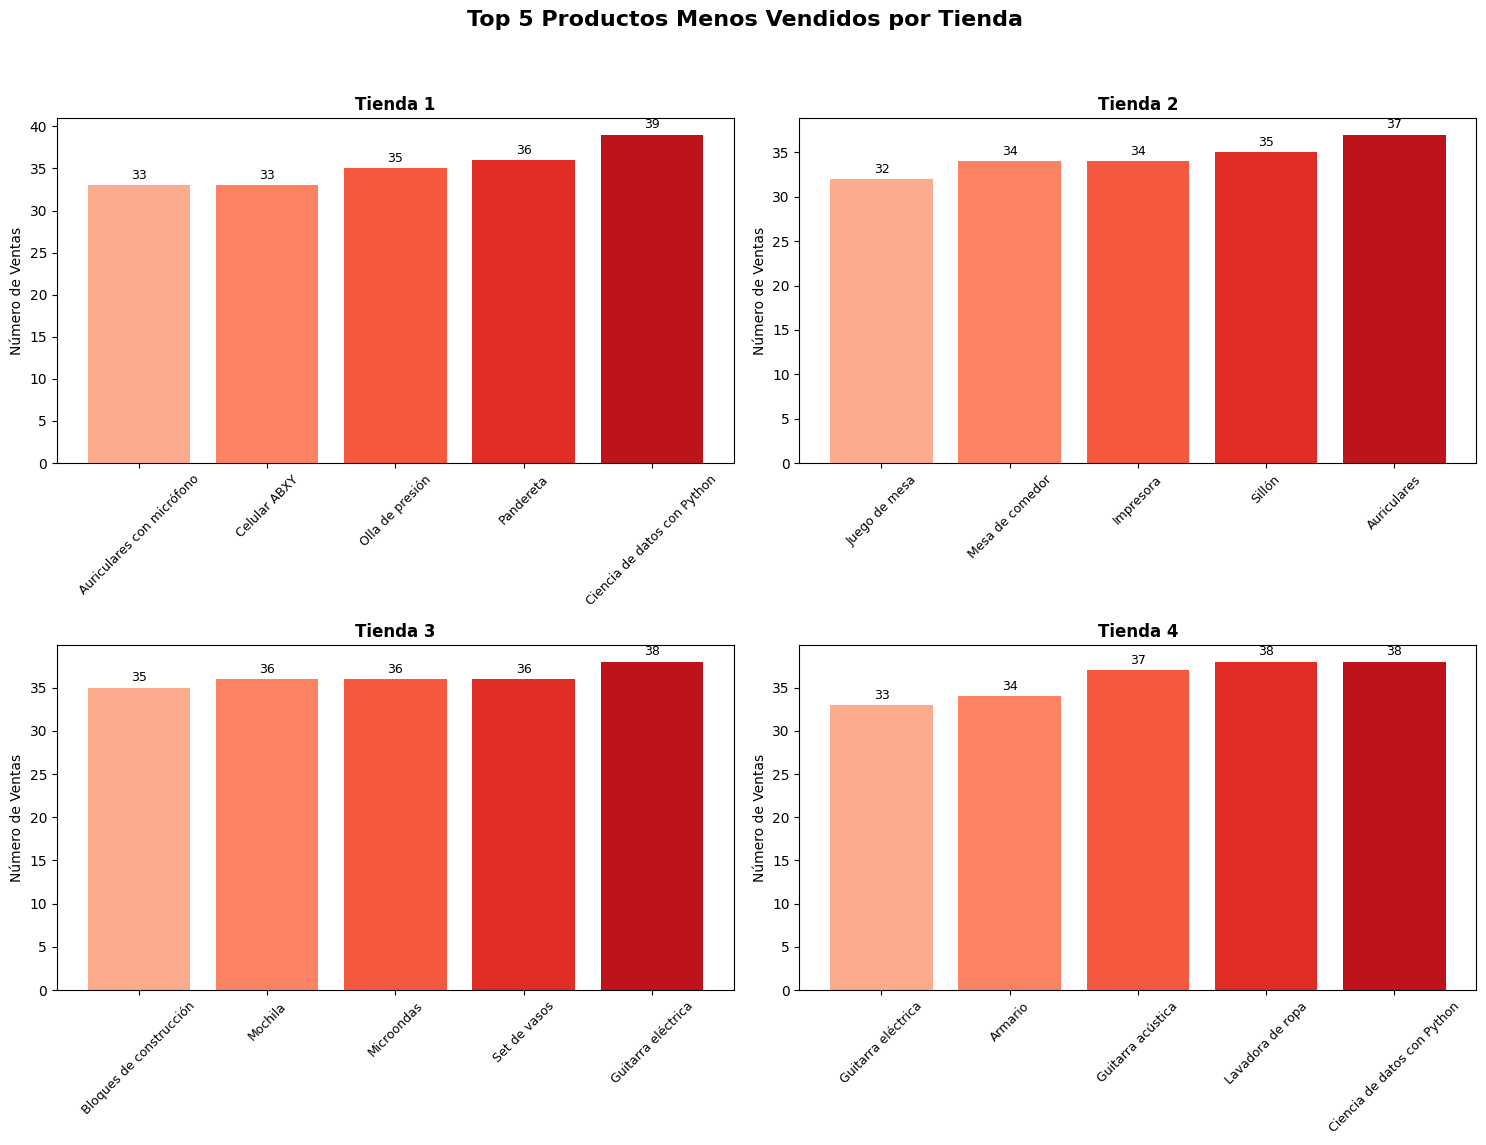

In [ ]:
# Calcular conteo de ventas para cada producto en cada tienda
prod_counts = [df['Producto'].value_counts() for df in [tienda1, tienda2, tienda3, tienda4]]
store_names = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Extraer top 5 y bottom 5 (menos vendidos)
top5_list = [counts.head(5) for counts in prod_counts]
bottom5_list = [counts.tail(5).sort_values(ascending=True) for counts in prod_counts]

def plot_product_sales(data_list, title, cmap_name):
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    axes = axs.flatten()

    for i, ax in enumerate(axes):
        datos = data_list[i]
        productos = datos.index.tolist()
        conteos = datos.values.tolist()

        if not productos:
            ax.text(0.5, 0.5, 'Sin datos', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(store_names[i], fontsize=12)
            continue

        colores = plt.cm.get_cmap(cmap_name)(np.linspace(0.3, 0.8, len(productos)))

        ax.bar(productos, conteos, color=colores)
        ax.set_title(store_names[i], fontsize=12, fontweight='bold')
        ax.set_ylabel("Número de Ventas")
        ax.tick_params(axis='x', rotation=45, labelsize=9)

        max_conteo = max(conteos) if conteos else 1
        for j, v in enumerate(conteos):
            if v > 0:
                ax.text(j, v + max_conteo * 0.01, str(v), ha='center', va='bottom', fontsize=9)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Graficar top 5 productos más vendidos
plot_product_sales(top5_list, 'Top 5 Productos Más Vendidos por Tienda', 'Greens_r')

# Graficar anti-top 5 productos menos vendidos
plot_product_sales(bottom5_list, 'Top 5 Productos Menos Vendidos por Tienda', 'Reds')


**🔍 ANÁLISIS PRODUCTOS MÁS Y MENOS VENDIDOS**

### Ventas Totales  
- **Productos más vendidos:** 1,165 unidades acumuladas en las cuatro tiendas.  
- **Productos menos vendidos:** 709 unidades acumuladas en las cuatro tiendas.

### Ranking de Productos Más Vendidos  
1. **Iniciado en programación** (Tienda 2): 65 ventas  
2. **Microondas** (Tienda 2) y **Cama box** (Tienda 4): 62 ventas cada uno  
3. **Batería** (Tienda 2): 61 ventas  
4. **Microondas**, **TV LED UHD 4K**, y **Armario** (Tienda 1): 60 ventas cada uno  
5. **Cubetería** (Tienda 4): 59 ventas  

### Ranking de Productos Menos Vendidos  
1. **Juego de mesa** (Tienda 2): 32 ventas  
2. **Auriculares con micrófono**, **Celular ABXY** (Tienda 1) y **Guitarra** (Tienda 4): 33 ventas cada uno  
3. **Impresora**, **Mesa de comedor** (Tienda 2) y **Armario** (Tienda 4): 34 ventas cada uno  
4. **Olla a presión** (Tienda 1), **Sillón** (Tienda 2) y **Bloques de construcción** (Tienda 3): 35 ventas cada uno  
5. **Pandereta** (Tienda 1) y **Set de vasos**, **Microondas**, **Mochila** (Tienda 3): 36 ventas cada uno  

### Observaciones  
- El producto más vendido es **"Iniciado en programación"** de Tienda 2.  
- Los productos más vendidos están concentrados mayormente en Tiendas 1, 2 y 4.  
- El producto menos vendido es **"Juego de mesa"** en Tienda 2.  
- La distribución de los productos menos vendidos está más dispersa entre las tiendas.

---

## Sistema de Puntuación y Rendimiento por Tienda

### Reglas de Puntuación  
- Productos más vendidos otorgan puntos positivos:  
  1°: +11, 2°: +7, 3°: +5, 4°: +3, 5°: +1  
- Productos menos vendidos restan puntos negativos:  
  1°: -11, 2°: -7, 3°: -5, 4°: -3, 5°: -1  
- Puntaje final = suma de puntos positivos y negativos.

### Resultados por Tienda  
| Tienda  | Puntos Positivos | Puntos Negativos | Puntaje Final |
|---------|------------------|------------------|--------------|
| Tienda 2| +23              | -24              | -1           |
| Tienda 4| +8               | -12              | -4           |
| Tienda 3| 0                | -6               | -6           |
| Tienda 1| +9               | -18              | -9           |

### Conclusión  
Tienda 2 lidera el ranking con el menor puntaje negativo, seguida por Tienda 4, Tienda 3 y Tienda 1. Esto refleja un mejor balance entre productos exitosos y menos exitosos en Tienda 2.

---


### 5. Envío promedio por tienda

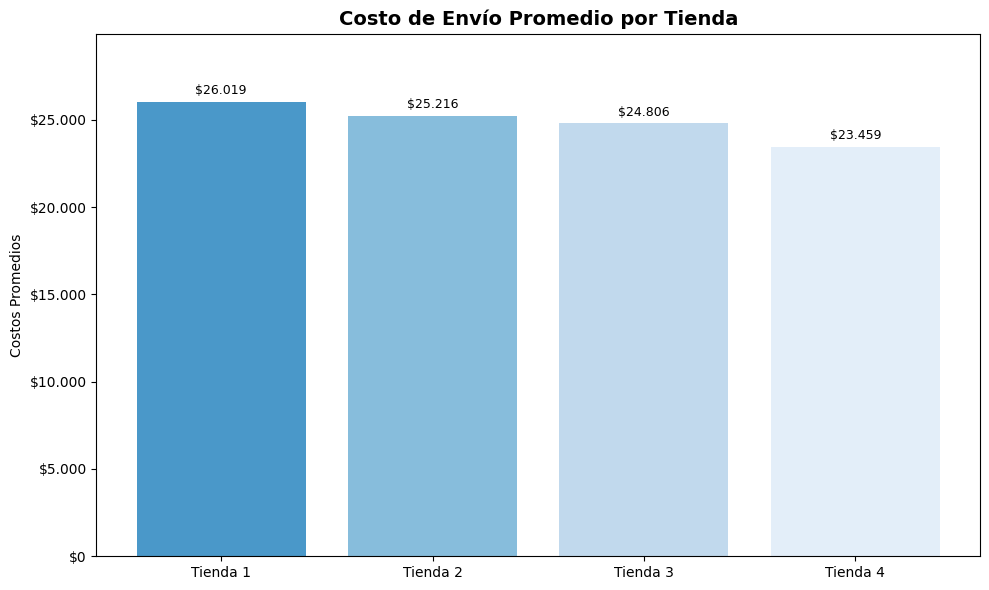

In [ ]:
# Calcular el costo de envío promedio para cada tienda con manejo de errores simplificado
def calcular_promedio_costo(df, columna='Costo de envío'):
    try:
        return df[columna].mean()
    except (KeyError, TypeError):
        return pd.NA

costos_promedio = [calcular_promedio_costo(tienda) for tienda in [tienda1, tienda2, tienda3, tienda4]]
store_names = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Filtrar datos válidos
valid_indices = [i for i, v in enumerate(costos_promedio) if pd.notna(v)]
nombres_validos = [store_names[i] for i in valid_indices]
costos_validos = [costos_promedio[i] for i in valid_indices]

# Función para formatear número con puntos como separador de miles
def format_con_puntos(numero):
    try:
        s = f"{numero:.0f}"
        resultado = ""
        for i, digito in enumerate(reversed(s)):
            if i > 0 and i % 3 == 0:
                resultado += "."
            resultado += digito
        return resultado[::-1]
    except (TypeError, ValueError):
        return str(numero)

# Formateador para eje y
def formato_moneda_completo(valor, pos):
    return f"${format_con_puntos(valor)}"

# Graficar costo de envío promedio con tonos azules
fig, ax = plt.subplots(figsize=(10, 6))

if not nombres_validos:
    ax.text(0.5, 0.5, 'Sin datos válidos', ha='center', va='center', transform=ax.transAxes)
else:
    colores = plt.cm.Blues_r(np.linspace(0.4, 0.9, len(nombres_validos)))
    ax.bar(nombres_validos, costos_validos, color=colores)
    ax.set_title("Costo de Envío Promedio por Tienda", fontsize=14, fontweight='bold')
    ax.set_ylabel("Costos Promedios")
    ax.tick_params(axis='x', rotation=0, labelsize=10)
    ax.yaxis.set_major_formatter(FuncFormatter(formato_moneda_completo))

    max_costo = max(costos_validos)
    for i, v in enumerate(costos_validos):
        ax.text(i, v + max_costo*0.01, formato_moneda_completo(v, None), ha='center', va='bottom', fontsize=9)
    ax.set_ylim(0, max_costo * 1.15)

plt.tight_layout()
plt.show()

**🔍 ANÁLISIS ENVIO PROMEDIO POR TIENDA**

- **Costo Promedio General:**  
El costo promedio de envío considerando las cuatro tiendas es aproximadamente USD 24.875 (valores individuales: USD 26.019, 25.216, 24.806 y 23.459).

- **Ranking de Tiendas por Costo de Envío Promedio:**  
1° Tienda 1: USD 26.019 (más alto)  
2° Tienda 2: USD 25.216  
3° Tienda 3: USD 24.806  
4° Tienda 4: USD 23.459 (más bajo)

- **Observaciones:**  
Existe una disminución gradual en el costo promedio desde la Tienda 1 hasta la Tienda 4, con una diferencia máxima de USD 2.560 entre ambas. Aunque la jerarquía es clara, las diferencias entre tiendas consecutivas son moderadas, lo que sugiere políticas de envío o destinos con costos escalonados y relativamente homogéneos.


-----------------------------------------------------------
# ✨ CONCLUSIÓN DESAFÍO:

Tras analizar en profundidad los distintos factores de desempeño, la recomendación es enfocar la venta de sucursal en la **Tienda 1**, sustentada en los siguientes puntos:

### 1. Desempeño Financiero:  
La Tienda 1 es la que genera los ingresos más altos dentro del grupo, consolidándose como el activo de mayor valor económico. Esta posición privilegiada representa una oportunidad para capitalizar un retorno significativo a través de su venta.

### 2. Señales de Alerta Operativas:  
A pesar de su liderazgo en ingresos, la Tienda 1 presenta indicadores preocupantes en términos de eficiencia y gestión:

- **Costo de envío elevado:** Impacta negativamente en la rentabilidad y puede reflejar ineficiencias logísticas o políticas de envío poco competitivas.  
- **Bajo rendimiento en puntaje de productos:** Sugiere posibles problemas en el manejo de inventario o en las estrategias de marketing para una parte significativa de su catálogo, lo que podría limitar su crecimiento futuro.  
- **Calificación promedio de clientes:** Aunque es relativamente alta, es la más baja entre las tiendas analizadas, indicando oportunidades para mejorar la experiencia del cliente y la satisfacción.

### 3. Estrategia para el Futuro:  
Vender la Tienda 1 ahora permite al Sr. Juan maximizar el valor de su principal activo antes de que estas debilidades operativas erosionen su valor. Además, con los recursos liberados, podrá enfocar esfuerzos en potenciar otras tiendas:

- **Tienda 2:** Destaca por su dinamismo, con potencial para crecimiento si se capitalizan sus fortalezas.  
- **Tienda 3:** Se caracteriza por estabilidad y altos niveles de satisfacción, representando un negocio más equilibrado y sostenible.

### 4. Resumen:
En definitiva, la venta de la Tienda 1 es una decisión estratégica que permite capitalizar su actual posición financiera y operacional, mientras se reorientan los recursos hacia negocios con perfiles operativos más balanceados o con problemas menos complejos. Esto posicionará mejor al Sr. Juan para asegurar un crecimiento sostenible y rentable en el tiempo.

---

